# Setup

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

# Overlap analysis

## String similarity

### Analyses of similarity data (data created in t-analysis-similarityMatrix.ipynb)

In [2]:
%%time
similToPlot = pd.DataFrame()
location = '../workproduct-files/similarityMatrix/partialDataFrames/'
for file in sorted(os.listdir(location)):
    similToPlot = similToPlot.append(pd.read_pickle(location + file))
similToPlot.reset_index(drop = True, inplace = True)

IDtoIndex = pd.read_pickle('../workproduct-files/similarityMatrix/IDtoIndex.pkl')
t_data = pd.read_pickle('../workproduct-files/cleaned-dataframes/t_dataMaster.pkl')
print(len(similToPlot))

380455
Wall time: 5.6 s


In [3]:
%%time
similToPlot['i-id'] = similToPlot['i'].apply(lambda x: IDtoIndex.loc[IDtoIndex['index'] == x, 'CONS_id'].iloc[0])
print('first row done')
similToPlot['j-id'] = similToPlot['j'].apply(lambda x: IDtoIndex.loc[IDtoIndex['index'] == x, 'CONS_id'].iloc[0])
print('second row done')
similToPlot['i-question'] = similToPlot['i-id'].apply(lambda x: t_data.loc[t_data['CONS_id'] == x, 'CONS_question'].iloc[0])
print('third row done')
similToPlot['j-question'] = similToPlot['j-id'].apply(lambda x: t_data.loc[t_data['CONS_id'] == x, 'CONS_question'].iloc[0])
print('All done')

first row done
second row done
third row done
All done
Wall time: 56min 36s


In [4]:
%%time
bins = pd.cut(similToPlot['similarityRatio'], bins = np.linspace(0.8, 1, 21))
binsToPlot = bins.value_counts().sort_index()

Wall time: 24.9 ms


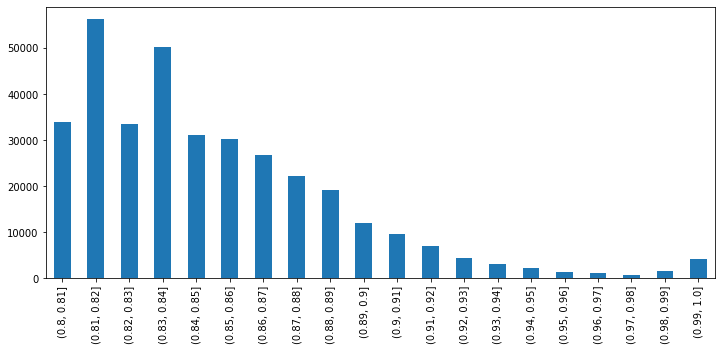

In [5]:
binsToPlot.plot.bar()

In [6]:
print(binsToPlot)

(0.8, 0.81]     33909
(0.81, 0.82]    56131
(0.82, 0.83]    33418
(0.83, 0.84]    50211
(0.84, 0.85]    31162
(0.85, 0.86]    30297
(0.86, 0.87]    26685
(0.87, 0.88]    22162
(0.88, 0.89]    19133
(0.89, 0.9]     11929
(0.9, 0.91]      9673
(0.91, 0.92]     7072
(0.92, 0.93]     4500
(0.93, 0.94]     3125
(0.94, 0.95]     2173
(0.95, 0.96]     1330
(0.96, 0.97]     1077
(0.97, 0.98]      792
(0.98, 0.99]     1482
(0.99, 1.0]      4288
Name: similarityRatio, dtype: int64


In [7]:
%%time
similToPlotSorted = similToPlot.sort_values('similarityRatio', ascending = False).reset_index(drop = True)

Wall time: 148 ms


In [8]:
%%time
similToPlotSorted.to_pickle('../workproduct-files/similarityMatrix/FullSimilarityComparison.pkl')

Wall time: 140 ms


In [9]:
# dfStyler = similToPlotSorted.reset_index(drop = True).style.set_properties(**{'text-align': 'left'})
# dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
# dfStyler

In [12]:
%%time
similToPlotSorted.iloc[6000:6400]

Wall time: 1.02 ms


,i,j,similarityRatio,i-id,j-id,i-question,j-question
6000,42367,12739,0.977778,tdb_0x00a57f,tdb_0x0031c3,Who invented dynamite?,Who invented dynamite ?
6001,28343,14296,0.977778,tdb_0x006eb7,tdb_0x0037d8,What are a chessboard's vertical rows called?,What are a cheesboard's vertical rows called?
6002,31207,31206,0.977778,tdb_0x0079e7,tdb_0x0079e6,What is a group of this animal called: Beaver?,What is a group of this animal called: Bear?
6003,3271,3270,0.977778,tdb_0x000cc7,tdb_0x000cc6,What is the basic unit of currency for Iraq ?,What is the basic unit of currency for Iran ?
6004,67517,42651,0.977778,rtg_0x0042f3,tdb_0x00a69b,Who is the one-eyed giant of Greek mythology?,Who is the one eyed giant of Greek mythology?
6005,30229,30228,0.977778,tdb_0x007615,tdb_0x007614,What does the electrical term 'dc' stand for?,What does the electrical term 'ac' stand for?
6006,70551,5531,0.977778,rtg_0x004ecd,tdb_0x00159b,"What war lasted from June 5 to June 10, 1967?","What war lasted from June 5 to June 11, 1967?"
6007,34478,34477,0.977778,tdb_0x0086ae,tdb_0x0086ad,What is the winter counterpart to estivation?,What is the winter counterpart of estivation?
6008,43830,43829,0.977778,tdb_0x00ab36,tdb_0x00ab35,Who was known as 'The Father of the H Bomb''?,Who was known as 'The Father of the A Bomb''?
6009,65497,30391,0.977778,rtg_0x003b0f,tdb_0x0076b7,"What European city is nicknamed ""Auld Reekie""?",What European city is nicknamed Auld Reekie?
